Name Surname: Akbar Bunyadzade

Student No: 912400214

---

Libraries to be used

---

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Logistic Regression (35 points)

Logistic Regression with MSE Loss (5 points)

In [2]:
class LogisticRegressionMSE:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        # implement here
        return 1 / (1 + np.exp(-z))

    def fit(self):
        # implement here
        n_samples, n_features = self.train_data.shape
        for i in range(1, self.iterations + 1):
          linear_output = np.dot(self.train_data, self.weights) + self.bias
          pred = self.sigmoid(linear_output)
          loss = np.mean((pred - self.train_label) ** 2)
          error = pred - self.train_label
          grad_term = error * pred * (1 - pred)
          dw = (2 / n_samples) * np.dot(self.train_data.T, grad_term)
          db = (2 / n_samples) * np.sum(grad_term)
          self.weights -= self.learning_rate * dw
          self.bias -= self.learning_rate * db

          # holding accuracy info for every 100 iterations
          if i%100 == 0:
            train_pred = self.predict(self.train_data)
            train_accuracy = accuracy_score(self.train_label, train_pred)
            self.accuracy_train_data_during_training.append(train_accuracy)
            test_pred = self.predict(self.test_data)
            test_accuracy = accuracy_score(self.test_label, test_pred)
            self.accuracy_test_data_during_training.append(test_accuracy)
            print(f'Iteration: {i}, Loss: {loss}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')

    def predict(self, test_data):
        # implement here
        linear_output = np.dot(test_data, self.weights) + self.bias
        pred = self.sigmoid(linear_output)
        return np.where(pred > 0.5, 1, 0)

Logistic Regression with Cross Entropy Loss (5 points)

In [3]:
class LogisticRegressionCrossEntropy:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []

    def sigmoid(self, z):
        # implement here
        return 1 / (1 + np.exp(-z))

    def fit(self):
        # implement here
        n_samples, n_features = self.train_data.shape
        for i in range(1, self.iterations + 1):
          linear_output = np.dot(self.train_data, self.weights) + self.bias
          pred = self.sigmoid(linear_output)

          # computing cross entropy loss - adding an infinitesimally small epsilon number to avoid Log(0)
          epsilon = 1e-15
          y_pred_adjusted = np.clip(pred, epsilon, 1 - epsilon)
          loss = -np.mean(self.train_label * np.log(y_pred_adjusted) + (1 - self.train_label) * np.log(1 - y_pred_adjusted))

          # gradient computation
          grad_weights = (1/n_samples) * np.dot(self.train_data.T, (pred - self.train_label))
          grad_bias = (1/n_samples) * np.sum(pred - self.train_label)

          # updating weights and bias
          self.weights -= self.learning_rate * grad_weights
          self.bias -= self.learning_rate * grad_bias

          if i%100 == 0:
            train_pred = self.predict(self.train_data)
            train_accuracy = accuracy_score(self.train_label, train_pred)
            self.accuracy_train_data_during_training.append(train_accuracy)

            test_pred = self.predict(self.test_data)
            test_accuracy = accuracy_score(self.test_label, test_pred)
            self.accuracy_test_data_during_training.append(test_accuracy)
            print(f'Iteration: {i}, Loss: {loss}, Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}')


    def predict(self, test_data):
        # implement here
        linear_output = np.dot(test_data, self.weights) + self.bias
        pred = self.sigmoid(linear_output)
        return np.where(pred > 0.5, 1, 0)

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


Training Logistic Regression with MSE Loss...
Iteration: 100, Loss: 0.09473825325431985, Train Accuracy: 0.9516483516483516, Test Accuracy: 0.9122807017543859
Iteration: 200, Loss: 0.06913870956552914, Train Accuracy: 0.9604395604395605, Test Accuracy: 0.9473684210526315
Iteration: 300, Loss: 0.057647223453594715, Train Accuracy: 0.9648351648351648, Test Accuracy: 0.956140350877193
Iteration: 400, Loss: 0.05081606381732647, Train Accuracy: 0.9736263736263736, Test Accuracy: 0.956140350877193
Iteration: 500, Loss: 0.04621295479383247, Train Accuracy: 0.9736263736263736, Test Accuracy: 0.956140350877193
Iteration: 600, Loss: 0.04286696169918845, Train Accuracy: 0.9736263736263736, Test Accuracy: 0.956140350877193
Iteration: 700, Loss: 0.04030237256938128, Train Accuracy: 0.9758241758241758, Test Accuracy: 0.956140350877193
Iteration: 800, Loss: 0.03825832037757846, Train Accuracy: 0.9758241758241758, Test Accuracy: 0.956140350877193
Iteration: 900, Loss: 0.036579981966966914, Train Accur

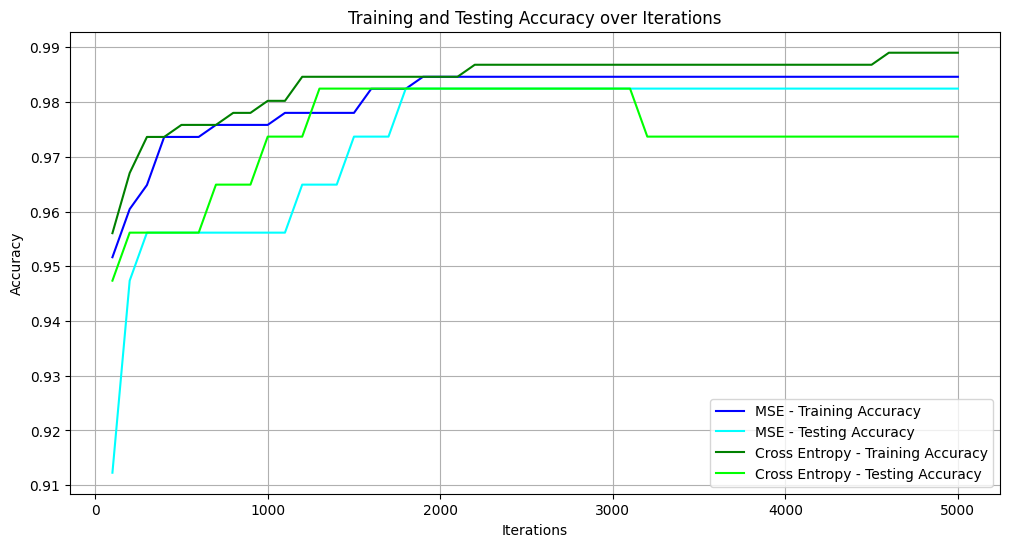

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_data, test_data, train_label, test_label = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model_mse = LogisticRegressionMSE(
    train_data=train_data,
    train_label=train_label,
    test_data=test_data,
    test_label=test_label,
    learning_rate=0.01,
    iterations=5000
)

print("Training Logistic Regression with MSE Loss...")
model_mse.fit()

model_ce = LogisticRegressionCrossEntropy(
    train_data=train_data,
    train_label=train_label,
    test_data=test_data,
    test_label=test_label,
    learning_rate=0.01,
    iterations=5000
)

print("\nTraining Logistic Regression with Cross Entropy Loss...")
model_ce.fit()

# Train scikit-learn's Logistic Regression for comparison
sklearn_model = SklearnLogisticRegression(
    solver='lbfgs',
    max_iter=5000,
    random_state=42
)
sklearn_model.fit(train_data, train_label)

sklearn_train_pred = sklearn_model.predict(train_data)
sklearn_test_pred = sklearn_model.predict(test_data)

# Calculate accuracies for the models
accuracy_mse_train = accuracy_score(train_label, model_mse.predict(train_data))
accuracy_mse_test = accuracy_score(test_label, model_mse.predict(test_data))

accuracy_ce_train = accuracy_score(train_label, model_ce.predict(train_data))
accuracy_ce_test = accuracy_score(test_label, model_ce.predict(test_data))

accuracy_sklearn_train = accuracy_score(train_label, sklearn_train_pred)
accuracy_sklearn_test = accuracy_score(test_label, sklearn_test_pred)

# Print the accuracies
print("\nFinal Accuracies:")
print("-------------------------------------------------")
print(f"Logistic Regression with MSE Loss - Training Accuracy: {accuracy_mse_train:.4f}")
print(f"Logistic Regression with MSE Loss - Testing Accuracy:  {accuracy_mse_test:.4f}")
print("-------------------------------------------------")
print(f"Logistic Regression with Cross Entropy Loss - Training Accuracy: {accuracy_ce_train:.4f}")
print(f"Logistic Regression with Cross Entropy Loss - Testing Accuracy:  {accuracy_ce_test:.4f}")
print("-------------------------------------------------")
print(f"Scikit-learn Logistic Regression - Training Accuracy: {accuracy_sklearn_train:.4f}")
print(f"Scikit-learn Logistic Regression - Testing Accuracy:  {accuracy_sklearn_test:.4f}")
print("-------------------------------------------------")

# Plotting the accuracies over iterations for custom implementations
iterations = np.arange(100, model_mse.iterations + 1, 100)

plt.figure(figsize=(12, 6))

# Plot for Logistic Regression with MSE Loss
plt.plot(iterations, model_mse.accuracy_train_data_during_training, label='MSE - Training Accuracy', color='blue')
plt.plot(iterations, model_mse.accuracy_test_data_during_training, label='MSE - Testing Accuracy', color='cyan')

# Plot for Logistic Regression with Cross Entropy Loss
plt.plot(iterations, model_ce.accuracy_train_data_during_training, label='Cross Entropy - Training Accuracy', color='green')
plt.plot(iterations, model_ce.accuracy_test_data_during_training, label='Cross Entropy - Testing Accuracy', color='lime')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

#### Experiment

Dataset preparation

In [5]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use two Logistic Regression Methods on the dataset directly (10 points)
Show accuracy scores on test data

In [6]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']].isnull().sum())

Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Age         177
Embarked      2
dtype: int64


It seems there are some data processing parts here that need to be done before splitting. However, as the first block like under the title Experiment is predefined by the instructor here, implying no need for feature engineering, outlier or missing value detection, I'll also leave that part untouched.

Training Logistic Regression with MSE Loss...
Iteration: 100, Loss: 0.20704478963854694, Train Accuracy: 0.7800963081861958, Test Accuracy: 0.7798507462686567
Iteration: 200, Loss: 0.18549752316690635, Train Accuracy: 0.7768860353130016, Test Accuracy: 0.7873134328358209
Iteration: 300, Loss: 0.1738295801144316, Train Accuracy: 0.7865168539325843, Test Accuracy: 0.7910447761194029
Iteration: 400, Loss: 0.16687612091747286, Train Accuracy: 0.7865168539325843, Test Accuracy: 0.7873134328358209
Iteration: 500, Loss: 0.16240162198360483, Train Accuracy: 0.7849117174959872, Test Accuracy: 0.7798507462686567
Iteration: 600, Loss: 0.1593453913256482, Train Accuracy: 0.7865168539325843, Test Accuracy: 0.7798507462686567
Iteration: 700, Loss: 0.15715821314636347, Train Accuracy: 0.7849117174959872, Test Accuracy: 0.7798507462686567
Iteration: 800, Loss: 0.1555341049239969, Train Accuracy: 0.7849117174959872, Test Accuracy: 0.7910447761194029
Iteration: 900, Loss: 0.15429197122286095, Train Accu

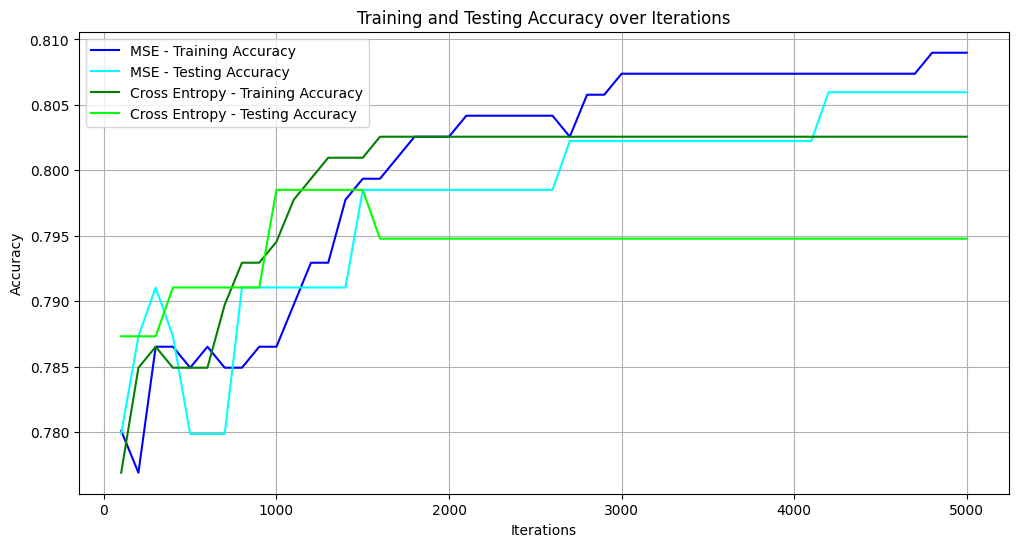

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_mse = LogisticRegressionMSE(
    train_data=X_train_scaled,
    train_label=y_train,
    test_data=X_test_scaled,
    test_label=y_test,
    learning_rate = 0.02)

print("Training Logistic Regression with MSE Loss...")
model_mse.fit()

model_ce = LogisticRegressionCrossEntropy(
    train_data=X_train_scaled,
    train_label=y_train,
    test_data=X_test_scaled,
    test_label=y_test,
    learning_rate = 0.02)

print("\nTraining Logistic Regression with Cross Entropy Loss...")
model_ce.fit()

accuracy_mse = accuracy_score(y_test, model_mse.predict(X_test_scaled))
accuracy_ce = accuracy_score(y_test, model_ce.predict(X_test_scaled))

print("\nFinal Accuracies:")
print("-------------------------------------------------")
print(f"Logistic Regression with MSE Loss - Testing Accuracy:  {accuracy_mse:.4f}")
print("-------------------------------------------------")
print(f"Logistic Regression with Cross Entropy Loss - Testing Accuracy:  {accuracy_ce:.4f}")

iterations = np.arange(100, model_mse.iterations + 1, 100)

plt.figure(figsize=(12, 6))
plt.plot(iterations, model_mse.accuracy_train_data_during_training, label='MSE - Training Accuracy', color='blue')
plt.plot(iterations, model_mse.accuracy_test_data_during_training, label='MSE - Testing Accuracy', color='cyan')

plt.plot(iterations, model_ce.accuracy_train_data_during_training, label='Cross Entropy - Training Accuracy', color='green')
plt.plot(iterations, model_ce.accuracy_test_data_during_training, label='Cross Entropy - Testing Accuracy', color='lime')

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over Iterations')
plt.legend()
plt.grid(True)
plt.show()

Plot the training and test accuracy across the learning iterations of gradient descent

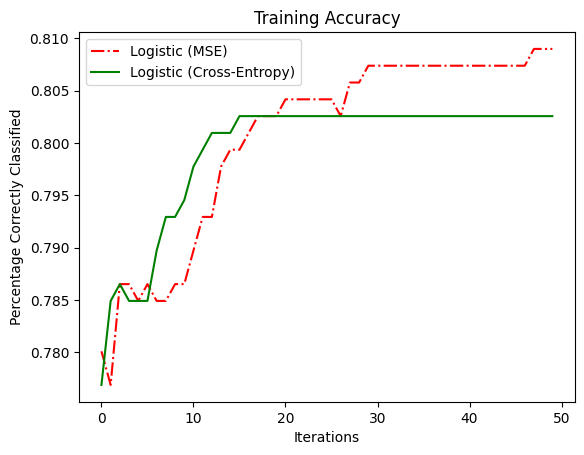

In [9]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Training Accuracy')
plt.plot(model_mse.accuracy_train_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_train_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

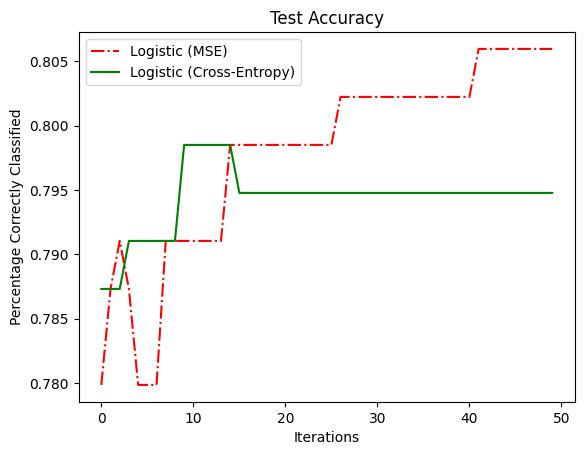

In [10]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Test Accuracy')
plt.plot(model_mse.accuracy_test_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_test_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

Explain the differences between MSE and Cross Entropy Loss in logistic regression, why is one of the versions of Logistic Regression learning faster in terms of gradient descent iterations than the other? (5 points)

Nature of Loss Functions:

MSE: Measures the average squared difference between predicted probabilities and actual labels. Primarily suited for regression.
Cross Entropy: Evaluates the dissimilarity between predicted probabilities and actual labels, tailored for classification.
Gradient Behavior:

MSE: Gradients diminish as predictions approach 0 or 1, leading to slow updates when the model is confident but possibly wrong.
Cross Entropy: Produces larger gradients for incorrect confident predictions, ensuring significant parameter updates.
Convergence Speed:

MSE: Due to vanishing gradients in confident regions, convergence can be sluggish, requiring more iterations.
Cross Entropy: Steeper gradients facilitate faster and more stable convergence, reducing the number of required iterations.

On top of all these, MSE doesnt align with the probabilistic framework of LR, while CR is related to maximizing the likelihood, thus making it more suitable for classifications problems.

Generally, Cross Entropy Loss is generally preferred in logistic regression as it provides more informative gradients, leading to quicker and more reliable convergence compared to MSE.

Answer:


Show the plots demonstrating the effects of the learning rate and the number of iterations parameters on the training process (hyperparameter tuning) (5 points)


Training with Iterations: 50

Training with Iterations: 500
Iteration: 100, Loss: 0.2247197482503343, Train Accuracy: 0.7752808988764045, Test Accuracy: 0.7798507462686567
Iteration: 200, Loss: 0.20692220947989043, Train Accuracy: 0.7800963081861958, Test Accuracy: 0.7798507462686567
Iteration: 300, Loss: 0.19442706366779144, Train Accuracy: 0.7768860353130016, Test Accuracy: 0.7873134328358209
Iteration: 400, Loss: 0.1854455823332952, Train Accuracy: 0.7768860353130016, Test Accuracy: 0.7873134328358209
Iteration: 500, Loss: 0.1788185193213702, Train Accuracy: 0.7768860353130016, Test Accuracy: 0.7910447761194029
Iteration: 100, Loss: 0.6050550718193106, Train Accuracy: 0.7800963081861958, Test Accuracy: 0.7798507462686567
Iteration: 200, Loss: 0.5564936102452411, Train Accuracy: 0.7768860353130016, Test Accuracy: 0.7873134328358209
Iteration: 300, Loss: 0.5279484506965152, Train Accuracy: 0.7817014446227929, Test Accuracy: 0.7873134328358209
Iteration: 400, Loss: 0.5100714043371586,

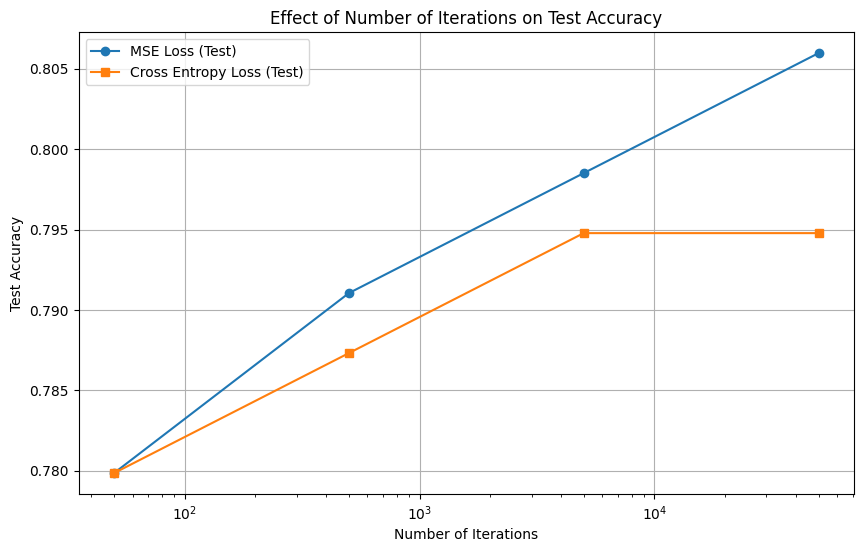

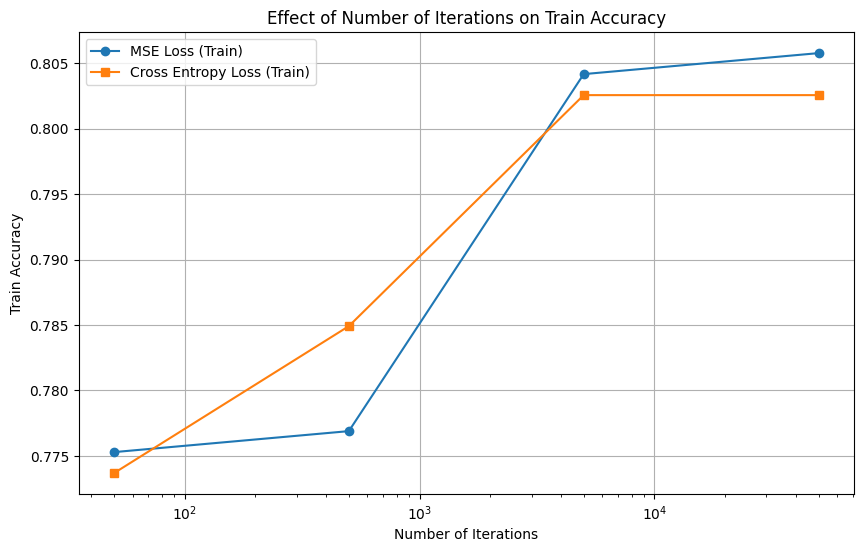

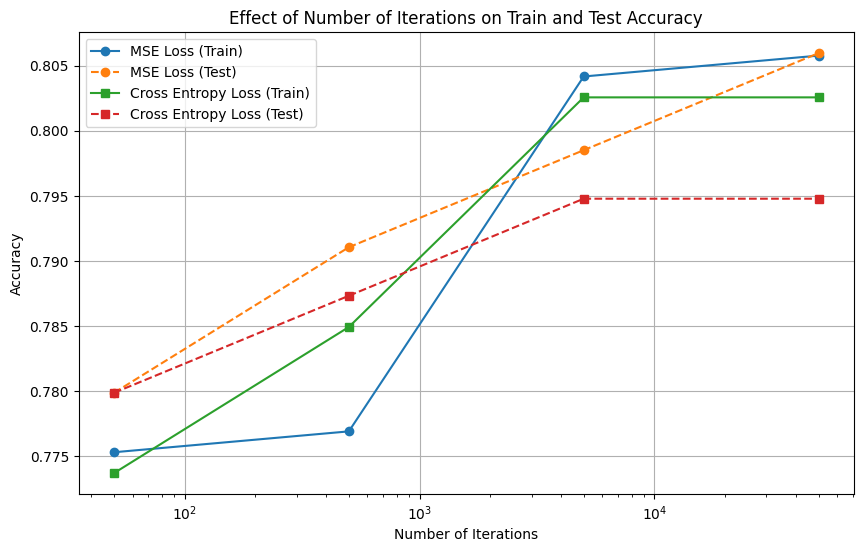

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

iteration_counts = [50, 500, 5000, 50000]

accuracies_mse_iters_test = {}
accuracies_ce_iters_test = {}
accuracies_mse_iters_train = {}
accuracies_ce_iters_train = {}

fixed_lr = 0.01

for iters in iteration_counts:
    print(f"\nTraining with Iterations: {iters}")

    model_mse = LogisticRegressionMSE(
        train_data=X_train_scaled,
        train_label=y_train,
        test_data=X_test_scaled,
        test_label=y_test,
        learning_rate=fixed_lr,
        iterations=iters
    )
    model_mse.fit()

    pred_test_mse = model_mse.predict(X_test_scaled)
    acc_mse_test = accuracy_score(y_test, pred_test_mse)
    accuracies_mse_iters_test[iters] = acc_mse_test

    pred_train_mse = model_mse.predict(X_train_scaled)
    acc_mse_train = accuracy_score(y_train, pred_train_mse)
    accuracies_mse_iters_train[iters] = acc_mse_train

    model_ce = LogisticRegressionCrossEntropy(
        train_data=X_train_scaled,
        train_label=y_train,
        test_data=X_test_scaled,
        test_label=y_test,
        learning_rate=fixed_lr,
        iterations=iters
    )
    model_ce.fit()

    pred_test_ce = model_ce.predict(X_test_scaled)
    acc_ce_test = accuracy_score(y_test, pred_test_ce)
    accuracies_ce_iters_test[iters] = acc_ce_test

    pred_train_ce = model_ce.predict(X_train_scaled)
    acc_ce_train = accuracy_score(y_train, pred_train_ce)
    accuracies_ce_iters_train[iters] = acc_ce_train

plt.figure(figsize=(10, 6))
plt.plot(iteration_counts, list(accuracies_mse_iters_test.values()), marker='o', label='MSE Loss (Test)')
plt.plot(iteration_counts, list(accuracies_ce_iters_test.values()), marker='s', label='Cross Entropy Loss (Test)')
plt.xlabel('Number of Iterations')
plt.ylabel('Test Accuracy')
plt.title('Effect of Number of Iterations on Test Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(iteration_counts, list(accuracies_mse_iters_train.values()), marker='o', label='MSE Loss (Train)')
plt.plot(iteration_counts, list(accuracies_ce_iters_train.values()), marker='s', label='Cross Entropy Loss (Train)')
plt.xlabel('Number of Iterations')
plt.ylabel('Train Accuracy')
plt.title('Effect of Number of Iterations on Train Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(iteration_counts, list(accuracies_mse_iters_train.values()), marker='o', linestyle='-', label='MSE Loss (Train)')
plt.plot(iteration_counts, list(accuracies_mse_iters_test.values()), marker='o', linestyle='--', label='MSE Loss (Test)')
plt.plot(iteration_counts, list(accuracies_ce_iters_train.values()), marker='s', linestyle='-', label='Cross Entropy Loss (Train)')
plt.plot(iteration_counts, list(accuracies_ce_iters_test.values()), marker='s', linestyle='--', label='Cross Entropy Loss (Test)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Iterations on Train and Test Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()


#### Decision Tree (35 points)

Implement Decision Tree Method (5 points)

In [12]:
class DecisionTree:
    def __init__(self, columns, depth=None):
        self.max_depth = depth
        self.columns = columns

    def fit(self, train_data, train_label):
        data = np.column_stack((train_data, train_label))
        self.tree = self._build_tree(data, depth=0)

    def predict(self, test_data):
        predictions = [self._traverse_tree(x, self.tree) for x in test_data]
        return np.array(predictions)

    def print_tree(self):
        self._print_tree_recursive(self.tree)

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, label=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.label = label
    def _build_tree(self, data, depth):
            X, y = data[:, :-1], data[:, -1]
            num_samples, num_features = X.shape
            unique_classes = np.unique(y)
            num_classes = len(unique_classes)

            # Stopping criteria
            if (self.max_depth is not None and depth >= self.max_depth) or num_classes == 1 or num_samples == 0:
                leaf_label = self._majority_vote(y)
                return self.Node(label=leaf_label)

            # Find the best split
            best_feature, best_threshold = self._best_split(X, y, num_features)

            if best_feature is None:
                leaf_label = self._majority_vote(y)
                return self.Node(label=leaf_label)

            # Split the data
            left_indices = X[:, best_feature] <= best_threshold
            right_indices = X[:, best_feature] > best_threshold
            left = data[left_indices]
            right = data[right_indices]

            # Handle cases where no split is possible
            if len(left) == 0 or len(right) == 0:
                leaf_label = self._majority_vote(y)
                return self.Node(label=leaf_label)

            # Recursively build left and right subtrees
            left_child = self._build_tree(left, depth + 1)
            right_child = self._build_tree(right, depth + 1)
            return self.Node(feature=best_feature, threshold=best_threshold, left=left_child, right=right_child)

    def _best_split(self, X, y, num_features):
        best_gini = 1.0
        best_feature, best_threshold = None, None
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)
        class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}

        for feature in range(num_features):
            # Sort data along the feature
            sorted_indices = np.argsort(X[:, feature])
            sorted_X = X[sorted_indices, feature]
            sorted_y = y[sorted_indices]

            # Initialize counts
            num_left = [0] * num_classes
            num_right = np.bincount(sorted_y.astype(int), minlength=num_classes).tolist()

            for i in range(1, len(y)):
                label = int(sorted_y[i - 1])  # Ensure label is int
                if label in class_to_index:
                    idx = class_to_index[label]
                    num_left[idx] += 1
                    num_right[idx] -= 1
                else:
                    # Handle unexpected class labels
                    continue

                # Skip if the current threshold is the same as the previous
                if sorted_X[i] == sorted_X[i - 1]:
                    continue

                # Calculate Gini impurity for left and right splits
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(num_classes))
                gini_right = 1.0 - sum((num_right[x] / (len(y) - i)) ** 2 for x in range(num_classes))
                gini = (i * gini_left + (len(y) - i) * gini_right) / len(y)

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = (sorted_X[i] + sorted_X[i - 1]) / 2  # Use midpoint as threshold

        return best_feature, best_threshold

    def _majority_vote(self, y):
        """
        Determine the majority class label.

        Parameters:
        - y (numpy.ndarray): Labels.

        Returns:
        - int: Majority class label.
        """
        counts = np.bincount(y.astype(int))
        return np.argmax(counts)

    def _traverse_tree(self, x, node):
        """
        Traverse the tree to make a prediction for a single sample.

        Parameters:
        - x (numpy.ndarray): Single sample features.
        - node (Node): Current node in the tree.

        Returns:
        - int: Predicted label.
        """
        if node.label is not None:
            return node.label

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

    def _print_tree_recursive(self, node, depth=0):
        """
        Recursively print the tree structure.

        Parameters:
        - node (Node): Current node in the tree.
        - depth (int): Current depth for indentation.
        """
        if node.label is not None:
            print("\t" * depth + f"Leaf: {node.label}")
            return

        feature_name = self.columns[node.feature]
        print("\t" * depth + f"{feature_name} <= {node.threshold:.4f}")
        self._print_tree_recursive(node.left, depth + 1)
        print("\t" * depth + f"{feature_name} > {node.threshold:.4f}")
        self._print_tree_recursive(node.right, depth + 1)


Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [20]:
### fill here ###
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
Y = data.target  # 0 = malignant, 1 = benign
columns = data.feature_names

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(pd.DataFrame(X, columns=columns).head())

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

# Feature Scaling: Normalize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree
# Select a subset of features for better visualization (optional)
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
selected_indices = [list(columns).index(feature) for feature in selected_features]
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]
selected_columns = selected_features

decision_tree = DecisionTree(columns=selected_columns, depth=3)  # Adjust depth as needed
decision_tree.fit(X_train_selected, y_train)

# Predict on test data
y_test_pred = decision_tree.predict(X_test_selected)

# Calculate accuracy
accuracy_custom = accuracy_score(y_test, y_test_pred)
print(f"Custom Decision Tree Accuracy on Test Data: {accuracy_custom:.4f}")
print(f"Custom Decision Tree Accuracy on Training Data: {accuracy_score(y_train, decision_tree.predict(X_train_selected)):.4f}")

# Print the tree structure
print("\nCustom Decision Tree Structure:")
decision_tree.print_tree()

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Custom Decision Tree Accuracy on Test Data: 0.8363
Custom Decision Tree Accuracy on Training Data: 0.9095

Custom Decision Tree Structure:
mean perimeter <= 0.2965
	mean perimeter <= -0.2715
		mean smoothness <= 1.6697
			Leaf: 1
		mean smoothness > 1.6697
			Leaf: 0
	mean perimeter > -0.2715
		mean smoothness <= -0.4230
			Leaf: 1
		mean smoothness > -0.4230
			Leaf: 0
mean perimeter > 0.2965
	mean texture <= -1.1672
		mean texture <= -1.5088
			Leaf: 0
		mean texture > -1.5088
			Leaf: 1
	mean texture > -1.1672
		mean smoothness <= -1.5811
			Leaf: 0
		mean smoothness > -1.5811
			Leaf: 0


#### Experiment

Dataset preparation

In [14]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use Decision Tree Method on the dataset directly (10 points)
Show accuracy score on test data

In [15]:
### fill here ###

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

decision_tree = DecisionTree(columns=columns, depth=5)
decision_tree.fit(X_train_scaled, y_train)

y_test_pred = decision_tree.predict(X_test_scaled)

accuracy_custom = accuracy_score(y_test, y_test_pred)
print(f"Custom Decision Tree Accuracy on Test Data: {accuracy_custom:.4f}")

Custom Decision Tree Accuracy on Test Data: 0.7761


Print the decision tree (5 points)

In [16]:
decision_tree.print_tree()

Survived <= 0.3333
	Sex <= 0.4008
		Name <= 0.1402
			Sex <= -0.1117
				Sex <= -0.4846
					Leaf: 0
				Sex > -0.4846
					Leaf: 0
			Sex > -0.1117
				Sex <= -0.0214
					Leaf: 0
				Sex > -0.0214
					Leaf: 0
		Name > 0.1402
			Sex <= -0.1121
				PassengerId <= 0.1930
					Leaf: 1
				PassengerId > 0.1930
					Leaf: 0
			Sex > -0.1121
				Sex <= -0.0100
					Leaf: 0
				Sex > -0.0100
					Leaf: 0
	Sex > 0.4008
		Pclass <= 0.7601
			Sex <= 0.5344
				Name <= 0.1402
					Leaf: 1
				Name > 0.1402
					Leaf: 1
			Sex > 0.5344
				Sex <= 6.9788
					Leaf: 0
				Sex > 6.9788
					Leaf: 1
		Pclass > 0.7601
			Leaf: 0
Survived > 0.3333
	PassengerId <= 0.1930
		Sex <= 2.2985
			Sex <= -0.0487
				Sex <= -0.0708
					Leaf: 1
				Sex > -0.0708
					Leaf: 0
			Sex > -0.0487
				Leaf: 1
		Sex > 2.2985
			Sex <= 2.3666
				Leaf: 0
			Sex > 2.3666
				Leaf: 1
	PassengerId > 0.1930
		Sex <= -0.1665
			Sex <= -0.3230
				Sex <= -0.4722
					Leaf: 1
				Sex > -0.4722
					Leaf: 0
			Sex > -0.3230
		

Show the impact of the max_depth hyperparameter on the accuracy score (hyperparameter tuning) (5 points)


Training Decision Trees with max_depth = 1

Training Decision Trees with max_depth = 2

Training Decision Trees with max_depth = 3

Training Decision Trees with max_depth = 4

Training Decision Trees with max_depth = 5

Training Decision Trees with max_depth = 6

Training Decision Trees with max_depth = 7

Training Decision Trees with max_depth = 8

Training Decision Trees with max_depth = 9

Training Decision Trees with max_depth = 10


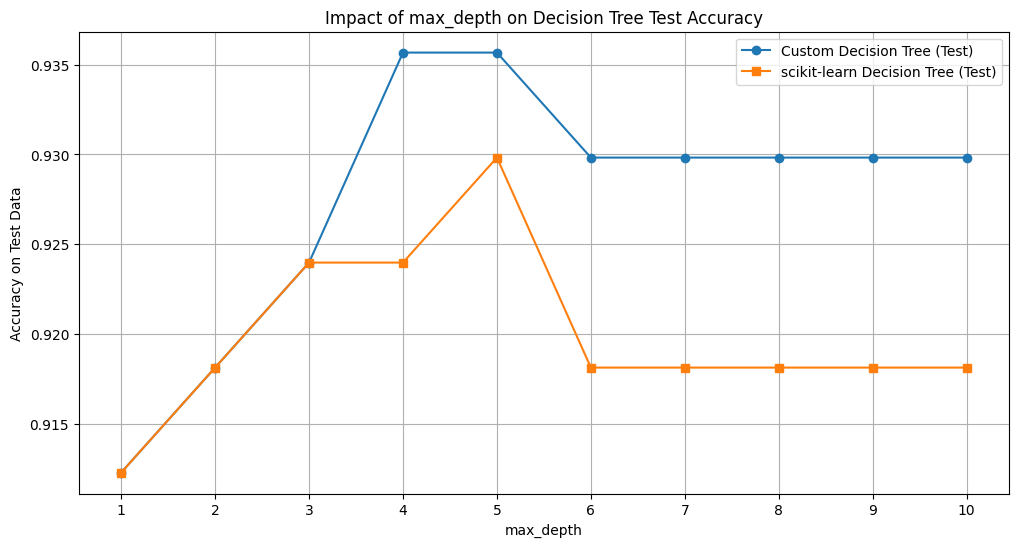

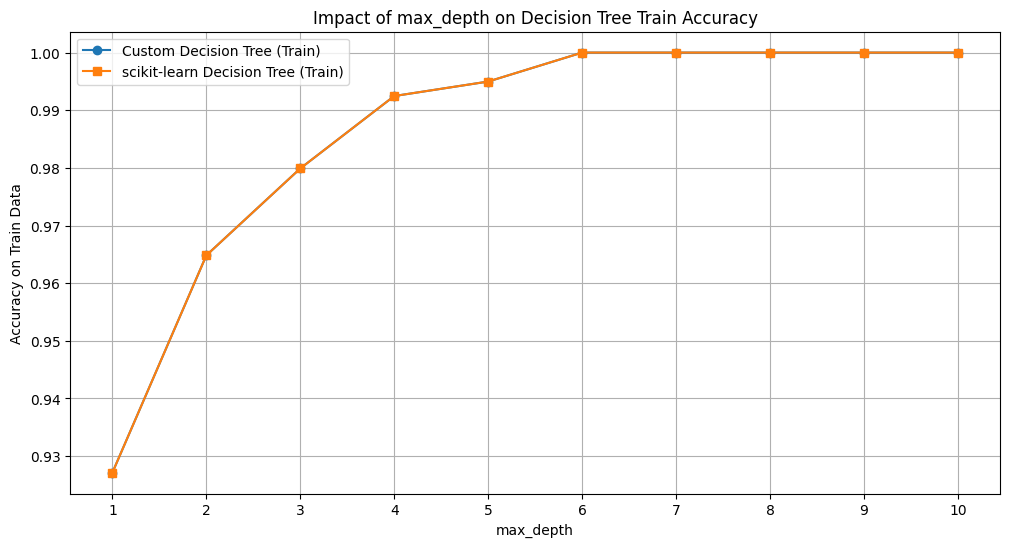

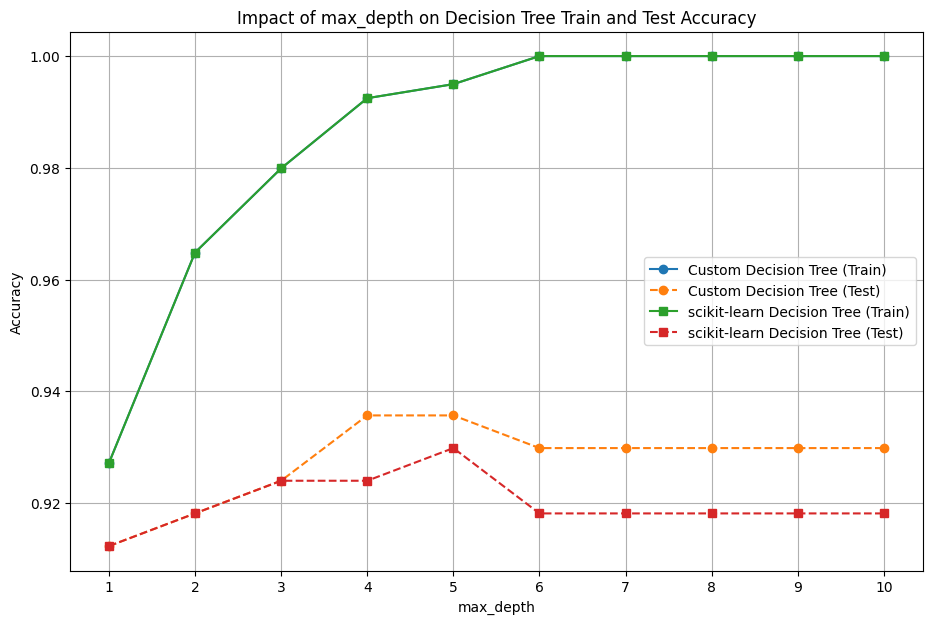

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

max_depth_values = range(1, 11)

accuracy_custom_test = []
accuracy_sklearn_test = []
accuracy_custom_train = []
accuracy_sklearn_train = []

for depth in max_depth_values:
    print(f"\nTraining Decision Trees with max_depth = {depth}")

    decision_tree = DecisionTree(columns=columns, depth=depth)
    decision_tree.fit(X_train_scaled, y_train)
    y_pred_custom_test = decision_tree.predict(X_test_scaled)
    acc_custom_test = accuracy_score(y_test, y_pred_custom_test)
    accuracy_custom_test.append(acc_custom_test)
    y_pred_custom_train = decision_tree.predict(X_train_scaled)
    acc_custom_train = accuracy_score(y_train, y_pred_custom_train)
    accuracy_custom_train.append(acc_custom_train)

    sklearn_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    sklearn_tree.fit(X_train_scaled, y_train)
    y_pred_sklearn_test = sklearn_tree.predict(X_test_scaled)
    acc_sklearn_test = accuracy_score(y_test, y_pred_sklearn_test)
    accuracy_sklearn_test.append(acc_sklearn_test)
    y_pred_sklearn_train = sklearn_tree.predict(X_train_scaled)
    acc_sklearn_train = accuracy_score(y_train, y_pred_sklearn_train)
    accuracy_sklearn_train.append(acc_sklearn_train)

plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, accuracy_custom_test, marker='o', label='Custom Decision Tree (Test)')
plt.plot(max_depth_values, accuracy_sklearn_test, marker='s', label='scikit-learn Decision Tree (Test)')
plt.xlabel('max_depth')
plt.ylabel('Accuracy on Test Data')
plt.title('Impact of max_depth on Decision Tree Test Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, accuracy_custom_train, marker='o', label='Custom Decision Tree (Train)')
plt.plot(max_depth_values, accuracy_sklearn_train, marker='s', label='scikit-learn Decision Tree (Train)')
plt.xlabel('max_depth')
plt.ylabel('Accuracy on Train Data')
plt.title('Impact of max_depth on Decision Tree Train Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(11, 7))
plt.plot(max_depth_values, accuracy_custom_train, marker='o', linestyle='-', label='Custom Decision Tree (Train)')
plt.plot(max_depth_values, accuracy_custom_test, marker='o', linestyle='--', label='Custom Decision Tree (Test)')
plt.plot(max_depth_values, accuracy_sklearn_train, marker='s', linestyle='-', label='scikit-learn Decision Tree (Train)')
plt.plot(max_depth_values, accuracy_sklearn_test, marker='s', linestyle='--', label='scikit-learn Decision Tree (Test)')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Impact of max_depth on Decision Tree Train and Test Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()


In [18]:
iris = load_iris()
X = iris['data']
Y = iris['target']
columns = iris['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Show your implementation on different dataset (5 points)

In [19]:
# fill here

print("First 5 rows of the Iris dataset:")
df = pd.DataFrame(X, columns=columns)
df['target'] = Y
display(df.head())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

decision_tree = DecisionTree(columns=columns, depth=4)
decision_tree.fit(X_train_scaled, y_train)

print("\nDecision Tree Structure:")
decision_tree.print_tree()

First 5 rows of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Decision Tree Structure:
petal length (cm) <= -0.8292
	Leaf: 0
petal length (cm) > -0.8292
	sepal width (cm) <= 1.6562
		sepal width (cm) <= 1.1765
			petal length (cm) <= 1.6225
				Leaf: 1
			petal length (cm) > 1.6225
				Leaf: 2
		sepal width (cm) > 1.1765
			Leaf: 2
	sepal width (cm) > 1.6562
		Leaf: 2
